### Lending Club dataset


Heatmap <br>
Loan grade and Loan Amount, Income, and Interest rate <br>
Loan Status and Loan Purpose <br>


In [8]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [9]:
df = pd.read_csv('./Data/LCdataset_cleaned80_254794.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,33000.0,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,...,0.0,2.0,100.0,21.4,0.0,0.0,351386.0,80128.0,123800.0,16158.0
1,19000.0,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,...,0.0,0.0,100.0,40.0,0.0,0.0,184034.0,28461.0,38400.0,35000.0
2,15000.0,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,...,0.0,5.0,100.0,0.0,0.0,0.0,404456.0,122865.0,29000.0,152751.0
3,21325.0,60 months,13.08%,486.09,B,B5,Senior Accountant,3 years,MORTGAGE,87000.0,...,0.0,1.0,100.0,14.3,0.0,0.0,661269.0,209441.0,54400.0,96631.0
4,12000.0,60 months,17.74%,303.03,C,C5,registered nurse,8 years,RENT,75000.0,...,0.0,2.0,97.8,27.3,0.0,0.0,186469.0,135367.0,46100.0,131569.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254789,15000.0,36 months,17.74%,540.34,C,C5,Special Education Teacher,1 year,RENT,62000.0,...,0.0,3.0,97.4,50.0,0.0,0.0,160317.0,136496.0,32800.0,124417.0
254790,6000.0,36 months,11.02%,196.49,B,B2,Assistant Foreman,10+ years,MORTGAGE,80000.0,...,0.0,1.0,100.0,33.3,0.0,0.0,259477.0,86503.0,13900.0,92418.0
254791,10525.0,36 months,7.56%,327.69,A,A3,Floor Finisher,10+ years,OWN,40000.0,...,0.0,5.0,98.0,0.0,0.0,0.0,70900.0,8774.0,38500.0,15000.0
254792,16000.0,36 months,11.71%,529.22,B,B3,Financial Counselor,10+ years,RENT,80000.0,...,0.0,8.0,85.7,0.0,0.0,0.0,22300.0,9359.0,9800.0,8400.0


In [10]:
df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 80, dtype: int64

In [11]:
df['int_rate'].dtype

dtype('O')

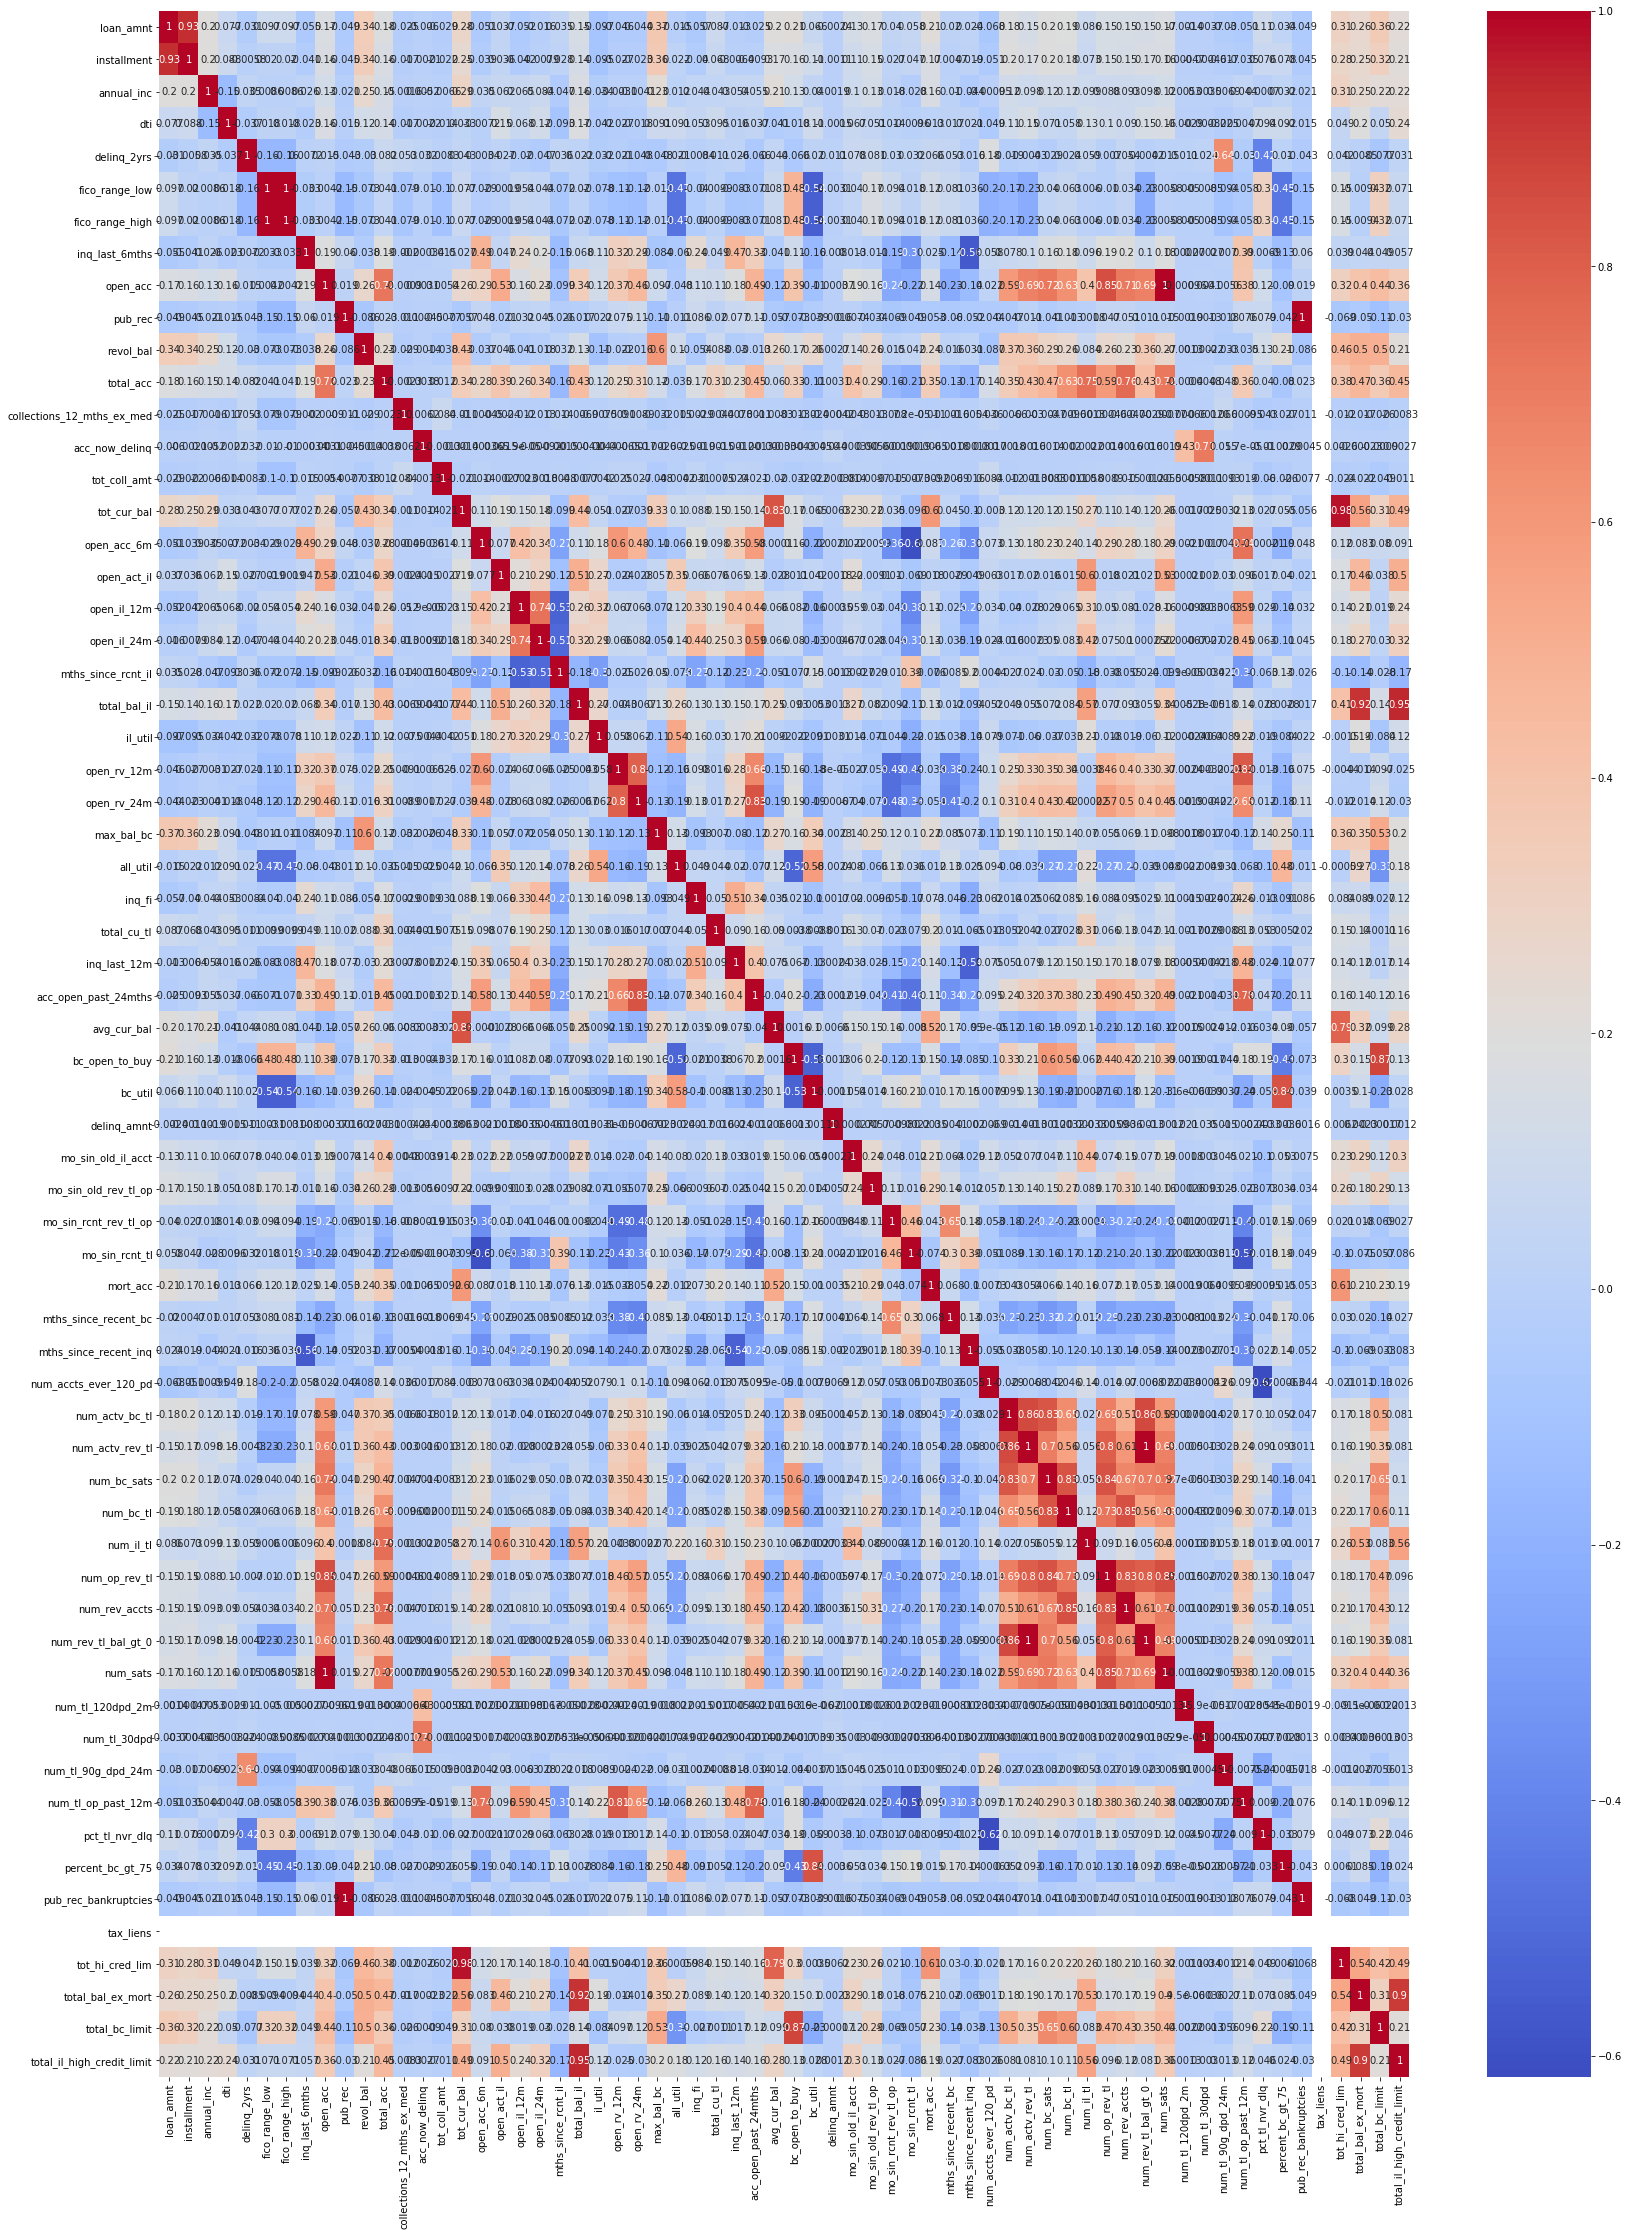

In [32]:
plt.subplots(figsize=(28,38))

sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

**This heatmap helps us idenitfy potenital Multicollinearity within variables. Here is the variables suffering from multicollinearity:**<br>
num_rev_tl_bal_gt_0 (in adddition, very low correlation to the target variable)<br>
num_actv_rev_tl<br>
total_il_high_credit_limit<br>
fico_range_high<br>
pub_rec<br>
installment<br>
tot_hi_cred_lim -- high corr to the target y variable<br>
num_sats<br>
open_rv_12m<br>